## load module

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

## load dataset

In [2]:
data_dir = '/home/yons/data/AID/AID'
import glob
image_path_list = glob.glob(os.path.join(data_dir, '*', '*'))
image_path_list.sort()
print(len(image_path_list))

categories = [d.name for d in os.scandir(data_dir) if d.is_dir()]
categories.sort()
print(len(categories))
class_to_idx = {categories[i]: i for i in range(len(categories))}
idx_to_class = {idx: class_ for class_, idx in class_to_idx.items()}
print(class_to_idx)


10000
30
{'Airport': 0, 'BareLand': 1, 'BaseballField': 2, 'Beach': 3, 'Bridge': 4, 'Center': 5, 'Church': 6, 'Commercial': 7, 'DenseResidential': 8, 'Desert': 9, 'Farmland': 10, 'Forest': 11, 'Industrial': 12, 'Meadow': 13, 'MediumResidential': 14, 'Mountain': 15, 'Park': 16, 'Parking': 17, 'Playground': 18, 'Pond': 19, 'Port': 20, 'RailwayStation': 21, 'Resort': 22, 'River': 23, 'School': 24, 'SparseResidential': 25, 'Square': 26, 'Stadium': 27, 'StorageTanks': 28, 'Viaduct': 29}


## view numbers

[360, 310, 220, 400, 360, 260, 240, 350, 410, 300, 370, 250, 390, 280, 290, 340, 350, 390, 370, 420, 380, 260, 290, 410, 300, 300, 330, 290, 360, 420]


categories  number
29           Viaduct     420
19              Pond     420
23             River     410
8   DenseResidential     410
3              Beach     400

categories  number
21  RailwayStation     260
5           Center     260
11          Forest     250
6           Church     240
2    BaseballField     220

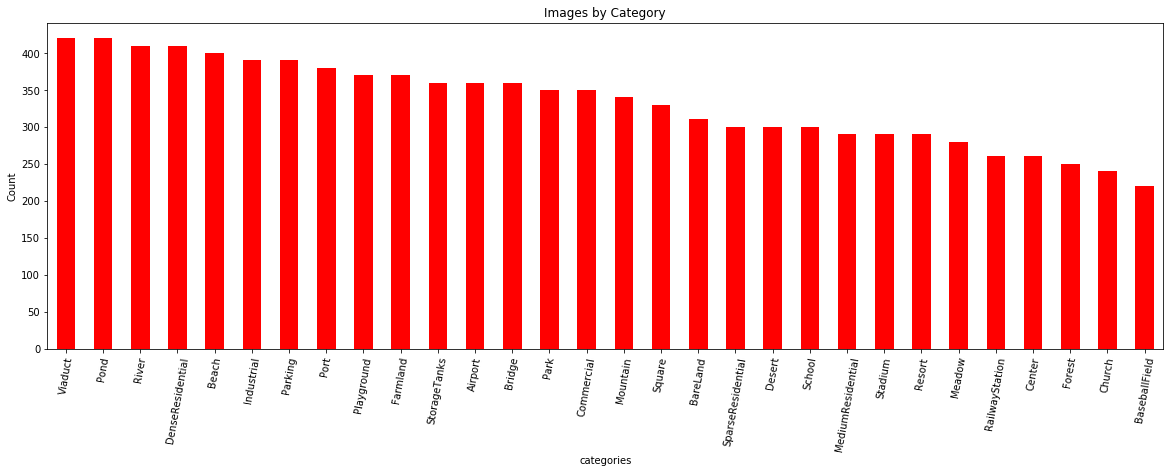

In [3]:
n_categories = []
for category in categories:
    n_categories.append(len(os.listdir(os.path.join(data_dir, category))))
print(n_categories)

import pandas as pd
cat_df = pd.DataFrame({'categories':categories, 'number':n_categories})
cat_df.sort_values('number', ascending=False, inplace=True)
cat_df.head()
cat_df.tail()

_ = plt.figure()
cat_df.set_index('categories')['number'].plot.bar(color='r', figsize=(20, 6))
_ = plt.xticks(rotation=80)
_ = plt.ylabel('Count')
_ = plt.title('Images by Category')


## view height and width

In [ ]:
import cv2
def multiprocess_run(process, obj_list, notebook=False):
    if notebook is True:
        from tqdm import tqdm_notebook as tqdm
    else:
        from tqdm import tqdm
    from multiprocessing import Pool
    import multiprocessing
    import time
    import sys
    cpus = multiprocessing.cpu_count()
    pool = Pool(processes=cpus)
    result_list = []
    tic = time.time()
    for result in tqdm(pool.imap(process, obj_list)):
        result_list.append(result)
        sys.stdout.flush()
    toc = time.time()
    print('time waste', toc - tic)
    return result_list

def process(image_path):
    category = os.path.dirname(image_path).split('/')[-1]
    try:
        h, w, _ = cv2.imread(image_path).shape
    except Exception as e:
        print(image_path)
        return None
    return {'category':category, 'height':h, 'width': w}

result_list = multiprocess_run(process, image_path_list, notebook=True)
    

In [5]:
img_category_list = []
img_height_list = []
img_width_list = []
for d in result_list:
    if d is not None:
        img_category_list.append(d['category'])
        img_height_list.append(d['height'])
        img_width_list.append(d['width'])
    
image_df = pd.DataFrame({
    'category': img_category_list,
    'height': img_height_list,
    'width': img_width_list
})

import seaborn as sns
img_dsc = image_df.groupby('category').describe()
img_dsc

## all of the dataset are 600*600


height                                                 \
                   count   mean  std    min    25%    50%    75%    max   
category                                                                  
Airport            360.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
BareLand           310.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
BaseballField      220.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Beach              400.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Bridge             360.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Center             260.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Church             240.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Commercial         350.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
DenseResidential   410.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Desert             300.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Farmland           370.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Forest             250.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Industrial         390.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Meadow             280.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
MediumResidential  290.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Mountain           340.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Park               350.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Parking            390.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Playground         370.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Pond               420.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Port               380.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
RailwayStation     260.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Resort             290.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
River              410.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
School             300.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
SparseResidential  300.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Square             330.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Stadium            290.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
StorageTanks       360.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   
Viaduct            420.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0   

                   width                                                 
                   count   mean  std    min    25%    50%    75%    max  
category                                                                 
Airport            360.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
BareLand           310.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
BaseballField      220.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Beach              400.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Bridge             360.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Center             260.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Church             240.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Commercial         350.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
DenseResidential   410.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Desert             300.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Farmland           370.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Forest             250.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Industrial         390.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Meadow             280.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
MediumResidential  290.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Mountain           340.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Park               350.0  600.0  0.0  600.0  600.0  600.0  600.0  600.0  
Parking            390.0  600.0  0.0  600.0  600.0  600.0  600

## split datasets

the aid official baseline: 20% - 86.86 | 50% - 89.53

we just conduct experiments using 50% as trainset, 50% as the valset

In [6]:
import random
random.shuffle(image_path_list)
image_path_list_train = image_path_list[:5000]
image_path_list_val = image_path_list[5000:]
print('train:', len(image_path_list_train))
print('val:', len(image_path_list_val))

train: 5000
val: 5000


## define datasets

In [7]:
from torch.utils.data import Dataset
from PIL import Image

class SceneDataset(Dataset):

    def __init__(self, samples, transform, notebook=False):
        self.transform = transform
        self.samples = samples
        self.get_item = self.get_item_from_path
        print(len(self.samples))

    def get_item_from_path(self, index):
        path, target = self.samples[index]
        with open(path, 'rb') as f:
            img = Image.open(f).convert('RGB')
        return img, target

    def __getitem__(self, index):
        sample, target = self.get_item(index)
        sample = self.transform(sample)
        return sample, target

    def __len__(self):
        return len(self.samples)
    
    
# test

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.Resize(224),
                             transforms.ToTensor()])
batch_size = 128
data = {
    'train':
    SceneDataset([(x, class_to_idx[x.split('/')[-2]]) for x in image_path_list_train], transform=transform),
    'val':
    SceneDataset([(x, class_to_idx[x.split('/')[-2]]) for x in image_path_list_val], transform=transform),
}
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=False),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=False),
}

test_iter = iter(dataloaders['train'])
inputs, targets = next(test_iter)
inputs.shape, targets.shape

5000
5000


(torch.Size([128, 3, 224, 224]), torch.Size([128]))

<Figure size 1152x1152 with 0 Axes>

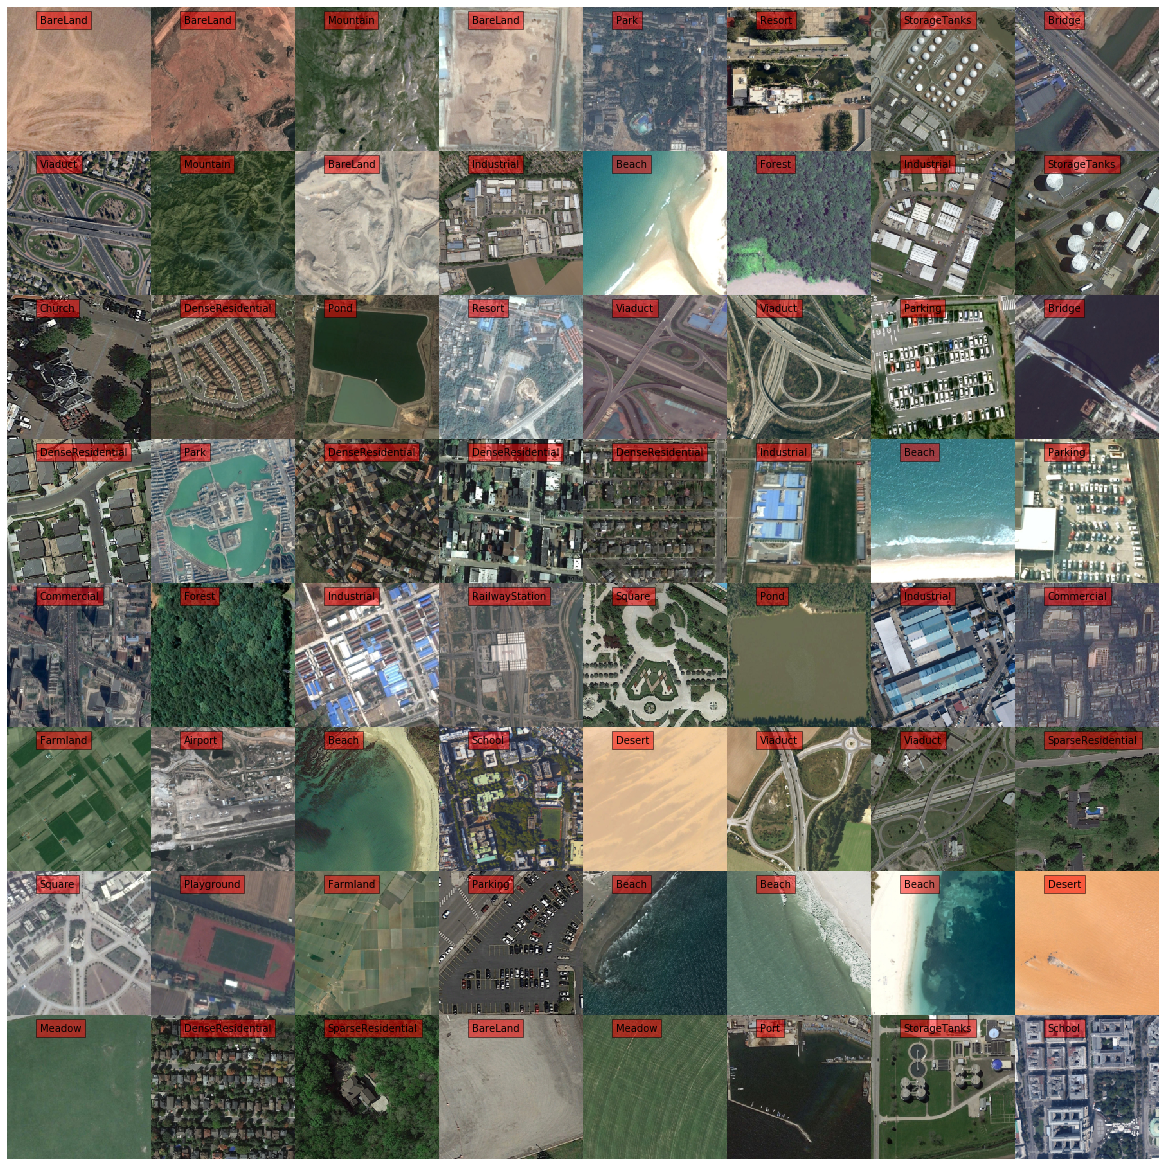

In [8]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    image = inputs[i]
    image = image.numpy().transpose((1, 2, 0))
    image = np.clip(image, 0, 1)
    label = idx_to_class[targets[i].item()]
    _ = ax.imshow(image)
    _ = ax.text(50, 25, str(label), bbox=dict(facecolor='red', alpha=0.5))
    _ = ax.axis('off')

## cat mean and std

In [9]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.Resize(224),
                             transforms.ToTensor()])



    
dataset = SceneDataset(samples=[(x, class_to_idx[x.split('/')[-2]]) for x in image_path_list_train], transform=transform)

loader = DataLoader(
    dataset,
    batch_size=128,
    num_workers=32,
    shuffle=False
)

print(len(loader))                                

mean = 0.
std = 0.
nb_samples = 0.
from tqdm import tqdm_notebook as tqdm
for step, data in tqdm(enumerate(loader)):
    inputs, targets = data
    batch_samples = inputs.size(0)
    inputs = inputs.view(batch_samples, inputs.size(1), -1)
    mean += inputs.mean(2).sum(0)
    std += inputs.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples
mean = mean.numpy()
std = std.numpy()

print(mean)
print(std)



5000
40



[0.3993387  0.4099782  0.36849037]
[0.14586602 0.1325128  0.12770559]


In [10]:
mean = [0.3989299, 0.41072574, 0.36983183]
std = [0.14689957, 0.13350782, 0.12862574]

## define transform

In [11]:
from torchvision import transforms
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'val':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
}

5000
5000


(torch.Size([128, 3, 224, 224]), torch.Size([128]))

<Figure size 1152x1152 with 0 Axes>

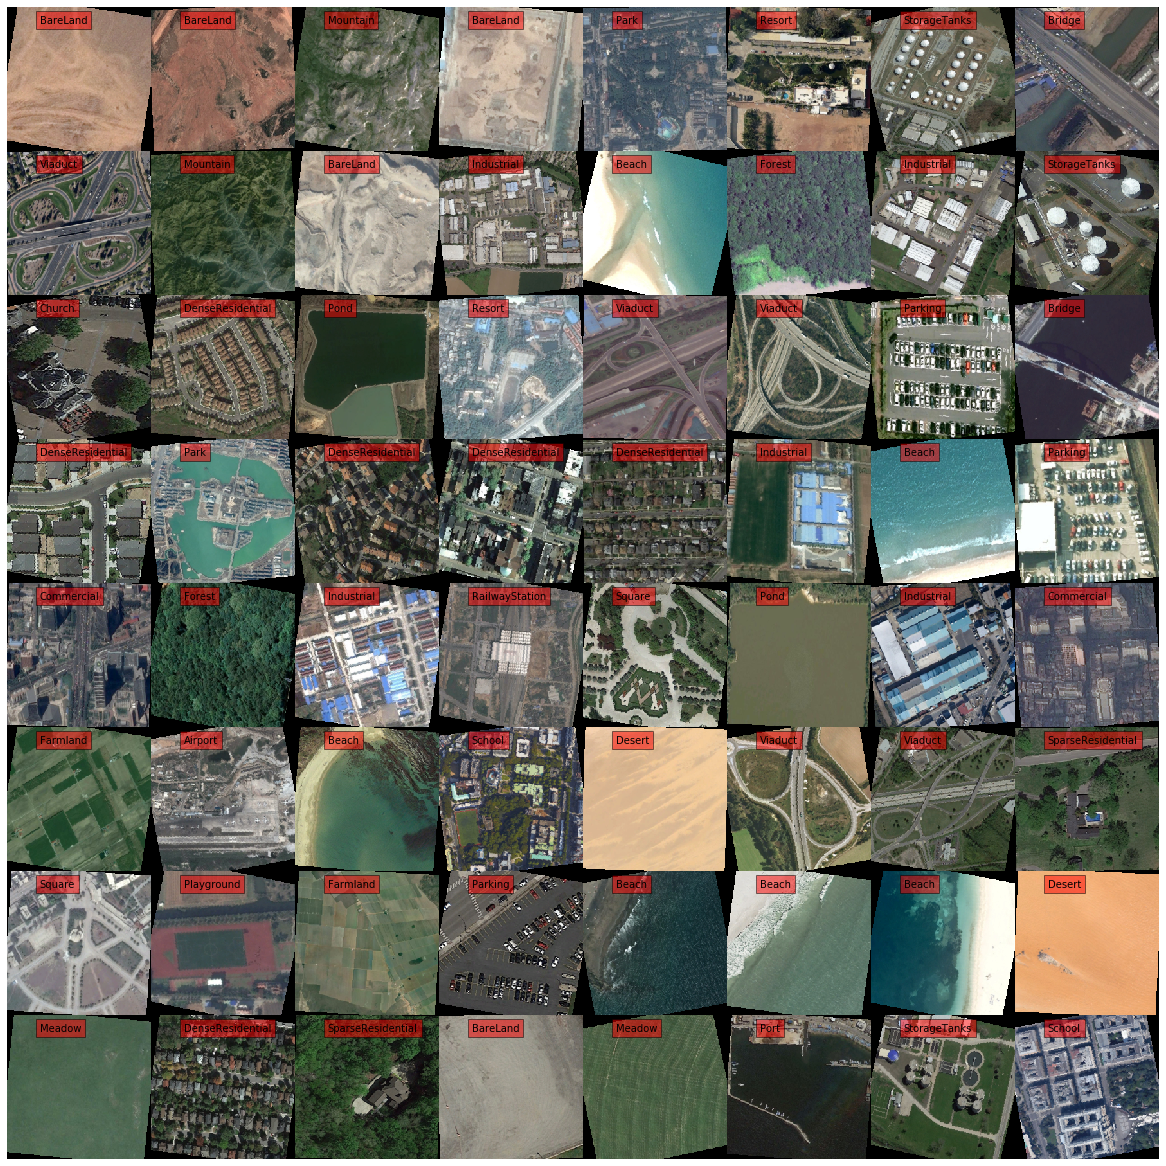

In [12]:
from torchvision import datasets
from torch.utils.data import DataLoader

batch_size = 128

data = {
    'train':
    SceneDataset([(x, class_to_idx[x.split('/')[-2]]) for x in image_path_list_train], transform=image_transforms['train']),
    'val':
    SceneDataset([(x, class_to_idx[x.split('/')[-2]]) for x in image_path_list_val], transform=image_transforms['val']),
}
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=False),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=False),
}

test_iter = iter(dataloaders['train'])
inputs, targets = next(test_iter)
inputs.shape, targets.shape

plt.figure(figsize=(16, 16))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    image = inputs[i]
    image = image.numpy().transpose((1, 2, 0))
    image = np.array(std) * image + np.array(mean)
    
    image = np.clip(image, 0, 1)
    label = idx_to_class[targets[i].item()]
    _ = ax.imshow(image)
    _ = ax.text(50, 25, str(label), bbox=dict(facecolor='red', alpha=0.5))
    _ = ax.axis('off')


## define model 
here we use resnext50

In [13]:
import torchvision
import torch.nn as nn
model = torchvision.models.resnext50_32x4d(pretrained=True)
for i, layer in enumerate(model.children()):
    if i < 6:
        for param in layer.parameters():
            param.requires_grad = False

n_inputs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.3),
    nn.Linear(256, 30))

In [14]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224), batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 112, 112]           9,408
       BatchNorm2d-2          [1, 64, 112, 112]             128
              ReLU-3          [1, 64, 112, 112]               0
         MaxPool2d-4            [1, 64, 56, 56]               0
            Conv2d-5           [1, 128, 56, 56]           8,192
       BatchNorm2d-6           [1, 128, 56, 56]             256
              ReLU-7           [1, 128, 56, 56]               0
            Conv2d-8           [1, 128, 56, 56]           4,608
       BatchNorm2d-9           [1, 128, 56, 56]             256
             ReLU-10           [1, 128, 56, 56]               0
           Conv2d-11           [1, 256, 56, 56]          32,768
      BatchNorm2d-12           [1, 256, 56, 56]             512
           Conv2d-13           [1, 256, 56, 56]          16,384
      BatchNorm2d-14           [1, 256,

## train

In [15]:
def train_val(net, criterion, optimizer, train_loader, val_loader):
    from tqdm.autonotebook import tqdm
    _ = net.train()
    train_loss = 0
    train_acc = 0
    for step, (inputs, targets) in tqdm(enumerate(train_loader)):
        inputs, targets = inputs.cuda(), targets.cuda()
        outputs = net(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, pred = torch.max(outputs, dim=1)
        correct_tensor = pred.eq(targets.data.view_as(pred))
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        train_acc += accuracy.item()
    train_loss, train_acc = train_loss / len(train_loader), train_acc / len(train_loader)

    _ = net.eval()
    with torch.no_grad():
        val_loss = 0
        val_acc = 0
        for step, (inputs, targets) in enumerate(val_loader):
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, pred = torch.max(outputs, dim=1)
            correct_tensor = pred.eq(targets.data.view_as(pred))
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            val_acc += accuracy.item()
    val_loss, val_acc = val_loss / len(val_loader), val_acc / len(val_loader)
    return train_loss, train_acc, val_loss, val_acc

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [ ]:
batch_size = 128
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=False),
}
print('train batch:%s' % len(dataloaders['train']))
print('val batch:%s' % len(dataloaders['val']))
# loss
criterion = nn.CrossEntropyLoss()
import torch
net = model.cuda()
net = nn.DataParallel(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[2, 8, 15, 20], gamma=0.1)
version = '0.1'
log_dir = 'AID-quickstart.log'
save_dir = os.path.join(log_dir, version)
import shutil
import os
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
else:
    shutil.rmtree(save_dir)
    os.makedirs(save_dir)
best_acc = 0
for epoch in range(25):
    scheduler.step()
    print('\n Version: %s Epoch: %d | learning rate:%f' % (version, epoch, get_lr(optimizer)))
    train_loss, train_acc, val_loss, val_acc = train_val(net, criterion, optimizer, dataloaders['train'], dataloaders['val'])
    print(epoch, train_loss, train_acc, val_loss, val_acc)

    if val_acc > best_acc:
        best_acc = val_acc
        save_path = os.path.join(save_dir, 'best_acc.pth')
        state = {
            'net': net.state_dict(),
            'epoch': epoch,
            'loss': val_loss,
            'acc': val_acc
        }
        torch.save(state, save_path)


## evaluate

In [18]:
save_path = os.path.join(save_dir, 'best_acc.pth')
checkpoint = torch.load(save_path)
net.load_state_dict(checkpoint['net'])
print(checkpoint['epoch'], checkpoint['loss'], checkpoint['acc'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

13 0.3272677581757307 0.92421875


In [22]:
import torch.nn.functional as F
_ = net.eval()
predict_prob_list_val = []
target_list_val = []
with torch.no_grad():
    val_loss = 0
    val_acc = 0
    for step, (inputs, targets) in tqdm(enumerate(dataloaders['val'])):
        inputs, targets = inputs.cuda(), targets.cuda()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        val_loss += loss.item()
        _, pred = torch.max(outputs, dim=1)
        correct_tensor = pred.eq(targets.data.view_as(pred))
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        val_acc += accuracy.item()
        # 计算probs备用
        probs = torch.exp(F.log_softmax(outputs, dim=1)).cpu().numpy()
        predict_prob_list_val.append(probs)
        targets = targets.cpu().numpy()
        target_list_val.append(targets)
val_loss, val_acc = val_loss / len(dataloaders['val']), val_acc / len(dataloaders['val'])
print(val_loss, val_acc)

predict_prob_npy = np.array(predict_prob_list_val)
predict_prob_npy = np.concatenate(predict_prob_npy, 0)
target_npy_val = np.array(target_list_val)
target_npy_val = np.concatenate(target_npy_val, 0)
from sklearn.metrics import accuracy_score
accuracy_score(target_npy_val, np.argmax(predict_prob_npy, 1))


0.3272677581757307 0.92421875


0.9224

## view top1 and top5 acc

top1 :  0.9224
top5 :  0.9694


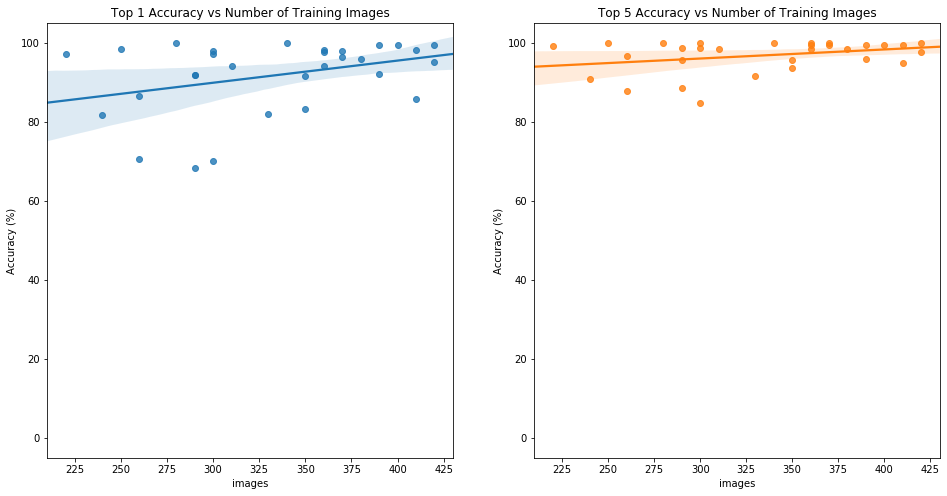

In [27]:
import pandas as pd
topk = 2
tmp = np.equal(np.argsort(predict_prob_npy, axis=1)[:,-topk:][:, ::-1], np.tile(target_npy_val.reshape((-1,1)), (1,topk)))
a = np.sum(tmp[:,(0,)], axis=1).reshape((-1,1))
b = np.sum(tmp, axis=1).reshape((-1,1))
acc_results = np.hstack((a,b)) * 100
print('top1 : ', np.sum(a) / predict_prob_npy.shape[0])
print('top5 : ', np.sum(b) / predict_prob_npy.shape[0])

classes = [idx_to_class[x] for x in target_npy_val]
results = pd.DataFrame(acc_results, columns=['top1', 'top5'])
results['class'] = classes
results = results.groupby(classes).mean().reset_index().rename(columns={'index': 'class'})

import seaborn as sns
results = results.merge(cat_df, left_on='class', right_on='categories').drop(columns=['categories'])
fig, axes = plt.subplots(1,2, figsize=(16,8))
ax = axes[0]
_ = sns.regplot(
    y='top1', x='number', data=results, ax=ax)
_ = ax.set_xlabel('images')
_ = ax.set_ylabel('Accuracy (%)')
_ = ax.set_title('Top 1 Accuracy vs Number of Training Images')
_ = ax.set_ylim(-5, 105)

ax = axes[1]
_ = sns.regplot(
    y='top5', x='number', data=results, ax=ax)
_ = ax.set_xlabel('images')
_ = ax.set_ylabel('Accuracy (%)')
_ = ax.set_title('Top 5 Accuracy vs Number of Training Images')
_ = ax.set_ylim(-5, 105)


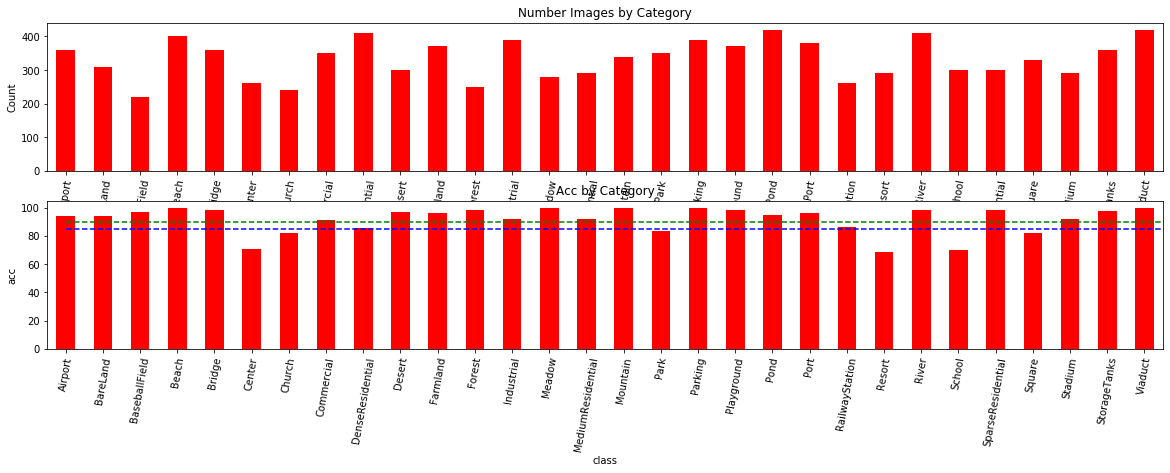

In [29]:
_ = plt.subplot(211)
results.set_index('class')['number'].plot.bar(
    color='r', figsize=(20, 6))
_ = plt.xticks(rotation=80)
_ = plt.ylabel('Count')
_ = plt.title('Number Images by Category')
_ = plt.subplot(212)

results.set_index('class')['top1'].plot.bar(
    color='r', figsize=(20, 6))
_ = plt.xticks(rotation=80)
_ = plt.ylabel('acc')
_ = plt.title('Acc by Category')
_ = plt.hlines(85, 0, 100, colors = "b", linestyles = "dashed")
_ = plt.hlines(90, 0, 100, colors = "g", linestyles = "dashed")




## plot confusion matrix

Normalized confusion matrix


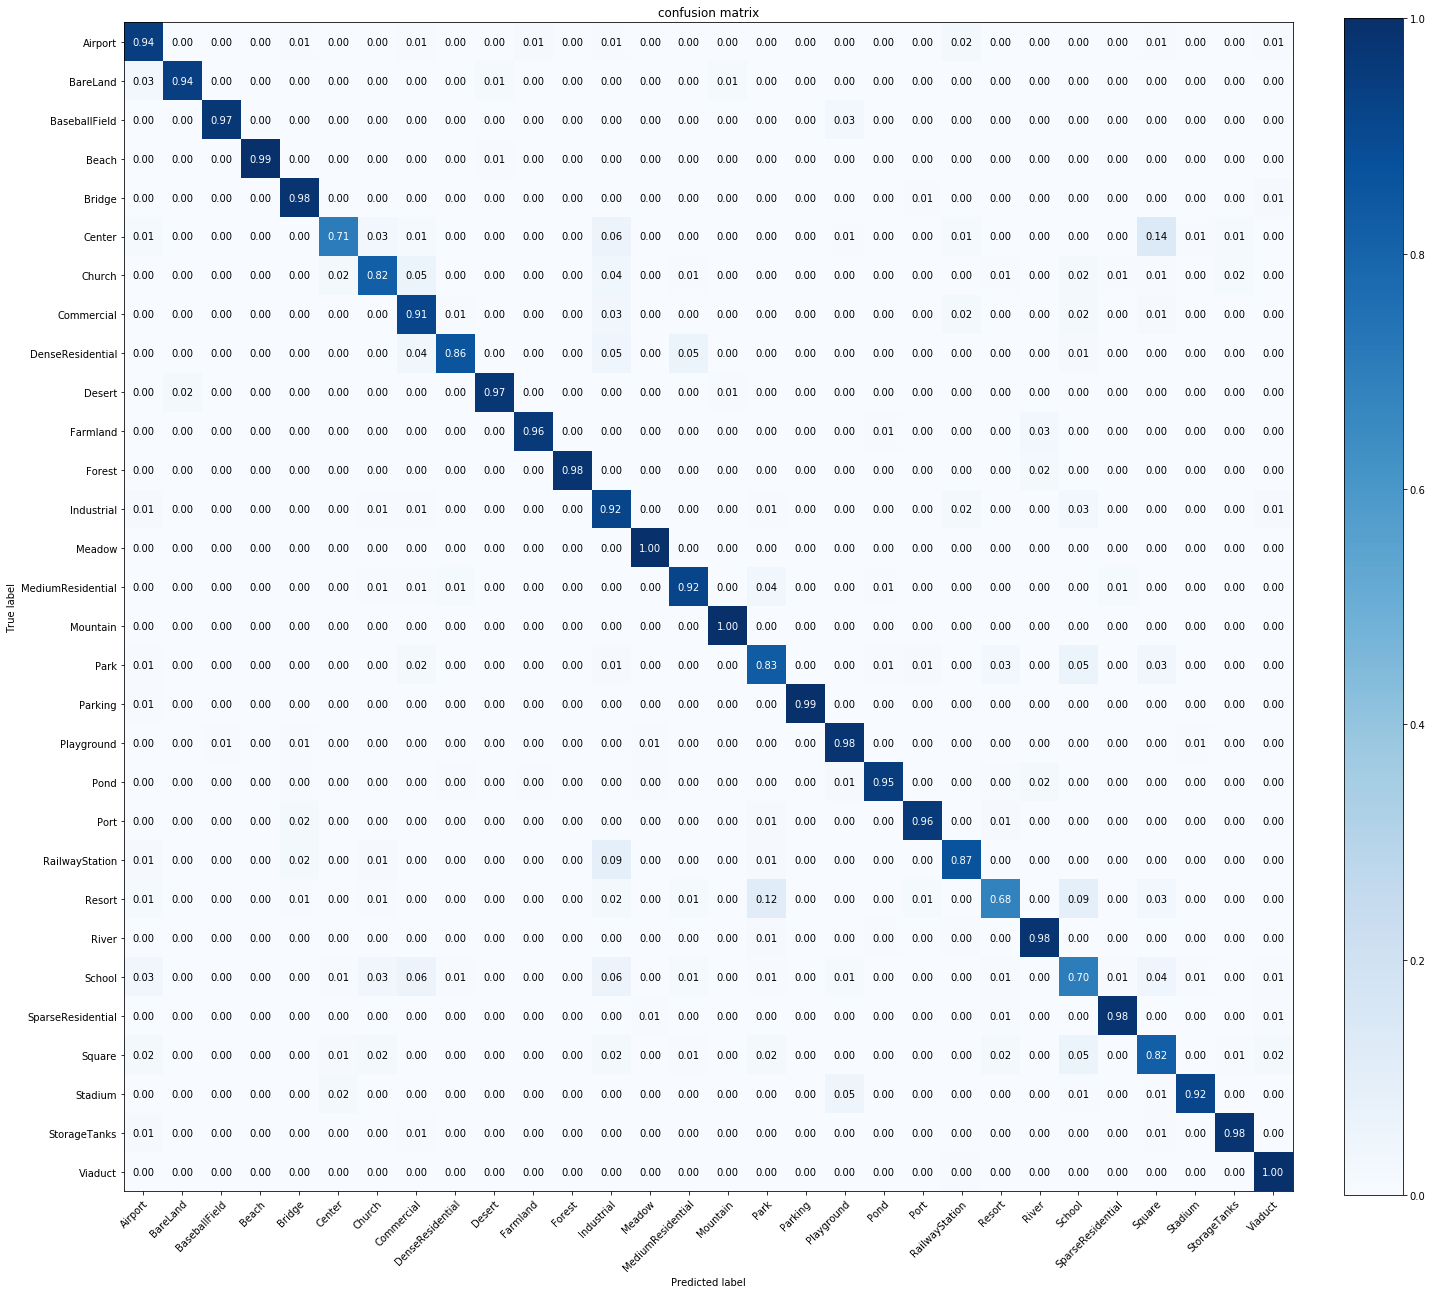

In [31]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=None, figsize=(20, 20)):
    import matplotlib.pyplot as plt
    cmap = plt.cm.Blues
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    import matplotlib.pyplot as plt
    import numpy as np

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
classes = [d.name for d in os.scandir(data_dir) if d.is_dir()]
classes.sort()
classes = np.array(classes)
plot_confusion_matrix(target_npy_val, np.argmax(predict_prob_npy, 1), classes, normalize=True,
                      title='confusion matrix', cmap=plt.cm.Blues)